# Gradient Descent

<img src="https://i2.wp.com/lh6.ggpht.com/-5RFMcz2bzWI/VA9NuUkB_vI/AAAAAAAAAdM/_DqqYO0nbX4/im2_thumb%25255B1%25255D.png"></img>

Gradient descent is the most important algorithm in machine learning (ML). It is used in almost all the ML models and is what differentiate traditional statistics from ML. By optimizing the parameters of the gradient descent we optimize the predictive model.
 
To understand gradient descent, we need to define some important concepts.
 
## Loss function

The loss function, also known as the cost function, is the measure we will use to calibrate the model. There are many types of loss functions. The selection of the loss function depends on the algorithm we want to run, and the question we want to answer (how we want to model the Y).
 
One of the most commonly used loss function is the Mean Squared Error (MSE). The formula of the MSE is:
 
<b> 
 MSE = Σ(y – pred)² / n
</b> 
 
This mean that we take difference between the real y and the predicted-y, square each of them, and sum all and divide by the number of rows in the dataset.


In [22]:
loss_function <- function(y,pred) { 
    return( sum((y - pred)^2)/length(y) )
}


## Global Minima
The global minima of the loss function is defined as the smallest value of the loss function. In other words, we find the global minima when we reduce the error at the lowest possible value.

<img src="https://cdn-images-1.medium.com/max/602/0*gWBpMIJ7yRVAaAIA."></img>

## Learning rate
 
The learning rate can be defined as the number of 'jumps' we make when trying to reduce the global minima while calculating the optimal values for the weights. We have to be careful with this parameter because a high value may miss out the global minima, while a very low value will increase a lot the calculation time. The learning rate parameter in many functions is called as <b> alpha </b>.

<table><tr>
    <td cols="2"> 
        <h2> Problems caused by too low or high learning rates </h2> 
    </td>
    </tr><tr>
    <td> 
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDZHOlr8UTVvLoA3adcxB7FQsVPusBU7lPSsVB-lunzaEPwahAQg" width="400" height="200"></img> 
        <br> <h4> High Learning Rate </h4>
    </td>
    <td> 
        <img src="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0403.png" width="400" height="200"></img> 
        <br> <h4> Low Learning Rate </h4>
    </td>
</tr></table>

## Gradient Descent
 
The formula for the calculation of the gradient descent is:
 
<img src="https://i2.wp.com/2.bp.blogspot.com/-ZxJ87cWjPJ8/TtLtwqv0hCI/AAAAAAAAAV0/9FYqcxJ6dNY/s320/gradient+descent+algorithm+OLS.png?zoom=1.25&resize=320%2C181"></img>
 
This means that the values of the weights (called theta or ϴ) are calculated using the loss function (Jϴ).
 
The initial theta values are generated randomly and the loss function is calculated using them. The calculation is made as follows:
 
 
<center>
    Y-hat = ϴ<sub>0</sub> + x<sub>1</sub>ϴ<sub>1</sub> + … + x<sub>n</sub>ϴ<sub>n</sub>
</center>
 
Then the loss function is calculated. If the model did not converged (the global minima was not reached), we increase/decrease theta by the learning rate, and recalculate the newly predicted Y (Y-hat). This is repeated until the global minima is reached.
 


In [23]:
### The gradient descent requires two values: learning rate and number of iterations.

gradientDesc <- function(x, y, learn_rate=1e-6, max_iter=1e3 ,seed =1) {
  #plot(x, y, col = "blue", pch = 20)
  conv_threshold <- 1e-4 #epcilon-MIN error requered
    set.seed(seed)
  n <- length(y)
  m <- runif(1, 0, 1)
  c <- runif(1, 0, 1)
  yhat <- m * x + c
# sum((y - pred)^2)/length(y)
  MSE <- loss_function(y,yhat)
  converged = F
  iterations = 0
  while(converged == F) {
    ## Implement the gradient descent algorithm
    m_new <- m - learn_rate * ((1 / n) * (sum((yhat - y) * x)))
    c_new <- c - learn_rate * ((1 / n) * (sum(yhat - y)))
    m <- m_new
    c <- c_new
    yhat <- m * x + c
    MSE_new <- loss_function(y,yhat)
    if(MSE - MSE_new <= conv_threshold) {
      #abline(c, m) 
      converged = T
      print(paste("Optimal intercept:", c, "Optimal slope:", m))
      return(data.frame(w=m,b=c,loss=MSE_new))
    }
    iterations = iterations + 1
    if(iterations > max_iter) { 
      #abline(c, m) 
      converged = T
      print(paste("Optimal intercept:", c, "Optimal slope:", m))
      return(data.frame(w=m,b=c,loss=MSE_new))
    }
  }
}




In [24]:
# Run the function 
gradientDesc(mtcars$disp, mtcars$mpg, 0.00002, 2500000)


[1] "Optimal intercept: 29.5993277493902 Optimal slope: -0.0412133348154412"


w,b,loss
<dbl>,<dbl>,<dbl>
-0.04121333,29.59933,9.911209


In [25]:
# Run the function 
gradientDesc(mtcars$disp, mtcars$mpg)

[1] "Optimal intercept: 0.377811463186887 Optimal slope: 0.0577696665692624"


w,b,loss
<dbl>,<dbl>,<dbl>
0.05776967,0.3778115,196.4694


In [26]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [27]:
mod <- lm(mtcars$mpg ~ mtcars$disp)
y_hat <- predict (mod)
mod$coefficients
MSE <- loss_function(mtcars$mpg,y_hat)
MSE

(Intercept) mtcars$disp 
29.59985476 -0.04121512

[1] 9.911209

In [28]:
## iterating with the learning rate
library(dplyr)
res <- NULL
learning_rate <- c(1e-1,5e-2,1e-2,5e-3,1e-3,5e-4,1e-4,5e-5,1e-5,5e-6,1e-6)
for (lr in learning_rate) {
    gd <- gradientDesc(mtcars$disp, mtcars$mpg, lr, 2500000)
    res <- rbind(res, data.frame(cbind(learning_rate=lr, gd)))
}


[1] "Optimal intercept: -3.78189164921576 Optimal slope: -1414.58550280844"
[1] "Optimal intercept: -1.70488387478948 Optimal slope: -707.159997072649"
[1] "Optimal intercept: -0.0432776552484647 Optimal slope: -141.219592484016"
[1] "Optimal intercept: 0.164423122194163 Optimal slope: -70.477041910437"
[1] "Optimal intercept: 0.330583744148265 Optimal slope: -13.8830014515737"
[1] "Optimal intercept: 0.351353821892527 Optimal slope: -6.80874639421581"
[1] "Optimal intercept: 0.367969884087938 Optimal slope: -1.14934234832948"
[1] "Optimal intercept: 0.370046891862364 Optimal slope: -0.441916842593691"
[1] "Optimal intercept: 29.4757428439056 Optimal slope: -0.0407947116081133"
[1] "Optimal intercept: 27.6952267833182 Optimal slope: -0.0347635111062482"
[1] "Optimal intercept: 12.6718185694387 Optimal slope: 0.0161257727171072"


learning_rate,w,b,loss
<dbl>,<dbl>,<dbl>,<dbl>
1e-06,1.612577e-02,12.67181857,7.251583e+01
5e-06,-3.476351e-02,27.69522678,1.070374e+01
1e-05,-4.079471e-02,29.47574284,9.914574e+00
5e-05,-4.419168e-01,0.37004689,1.720533e+04
1e-04,-1.149342e+00,0.36796988,9.945132e+04
5e-04,-6.808746e+00,0.35135382,3.211760e+06
1e-03,-1.388300e+01,0.33058374,1.323800e+07
5e-03,-7.047704e+01,0.16442312,3.388820e+08
1e-02,-1.412196e+02,-0.04327766,1.359522e+09


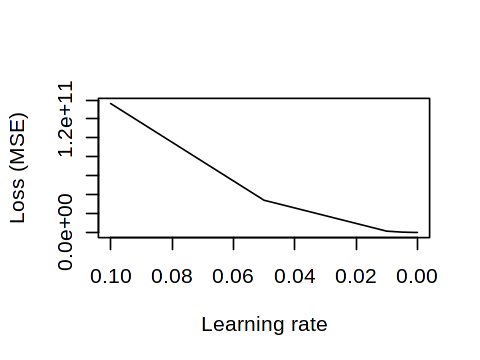

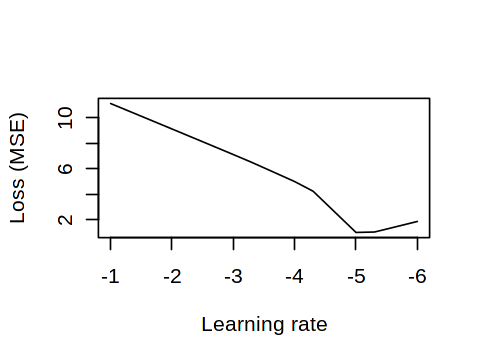

In [29]:
options(repr.plot.width = 4, repr.plot.height = 3)
res <- res %>% arrange(learning_rate)
res
plot(res$loss ~ res$learning_rate, type="l",
     xlab="Learning rate", ylab="Loss (MSE)",
     xlim = rev(range(res$learning_rate)))
plot(log10(res$loss) ~ log10(res$learning_rate), type="l",
     xlab="Learning rate", ylab="Loss (MSE)",
     xlim = rev(range(log10(res$learning_rate))))


In [30]:
learning_rate <- c(1e-5,2e-5,3e-5,5e-5,6e-5,7e-5,8e-5,9e-5,1e-4,2e-4,3e-4,5e-4,6e-4,7e-4,8e-4,9e-4,1e-3)
learning_rate


[1] 1e-05 2e-05 3e-05 5e-05 6e-05 7e-05 8e-05 9e-05 1e-04 2e-04 3e-04 5e-04
[13] 6e-04 7e-04 8e-04 9e-04 1e-03

In [31]:
res <- NULL
for (lr in learning_rate) {
    gd <- gradientDesc(mtcars$disp, mtcars$mpg, lr, 2500000)
    res <- rbind(res, data.frame(cbind(learning_rate=lr, gd)))
}


[1] "Optimal intercept: 29.4757428439056 Optimal slope: -0.0407947116081133"
[1] "Optimal intercept: 29.5993277493902 Optimal slope: -0.0412133348154412"
[1] "Optimal intercept: 0.370877694972134 Optimal slope: -0.158946640299374"
[1] "Optimal intercept: 0.370046891862364 Optimal slope: -0.441916842593691"
[1] "Optimal intercept: 0.369631490307479 Optimal slope: -0.583401943740849"
[1] "Optimal intercept: 0.369216088752593 Optimal slope: -0.724887044888007"
[1] "Optimal intercept: 0.368800687197708 Optimal slope: -0.866372146035165"
[1] "Optimal intercept: 0.368385285642823 Optimal slope: -1.00785724718232"
[1] "Optimal intercept: 0.367969884087938 Optimal slope: -1.14934234832948"
[1] "Optimal intercept: 0.363815868539085 Optimal slope: -2.56419335980106"
[1] "Optimal intercept: 0.359661852990233 Optimal slope: -3.97904437127264"
[1] "Optimal intercept: 0.351353821892527 Optimal slope: -6.80874639421581"
[1] "Optimal intercept: 0.347199806343675 Optimal slope: -8.22359740568739"
[1] "

learning_rate,w,b,loss
<dbl>,<dbl>,<dbl>,<dbl>
1e-05,-0.04079471,29.4757428,9.914574e+00
2e-05,-0.04121333,29.5993277,9.911209e+00
3e-05,-0.15894664,0.3708777,3.396251e+03
5e-05,-0.44191684,0.3700469,1.720533e+04
6e-05,-0.58340194,0.3696315,2.820044e+04
7e-05,-0.72488704,0.3692161,4.192259e+04
8e-05,-0.86637215,0.3688007,5.837179e+04
9e-05,-1.00785725,0.3683853,7.754803e+04
1e-04,-1.14934235,0.3679699,9.945132e+04


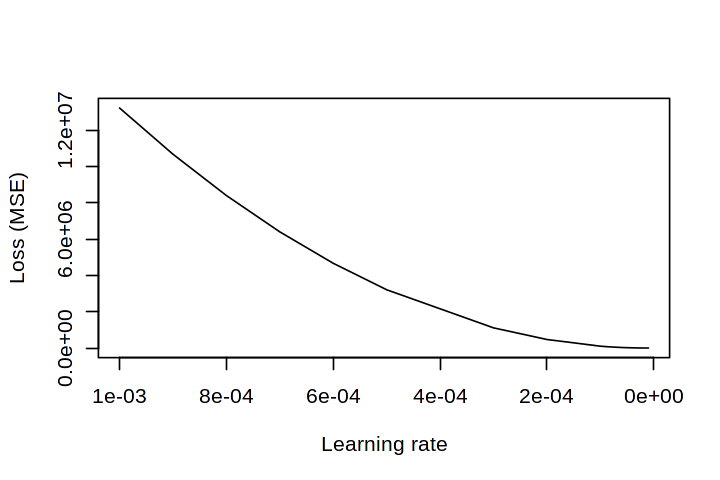

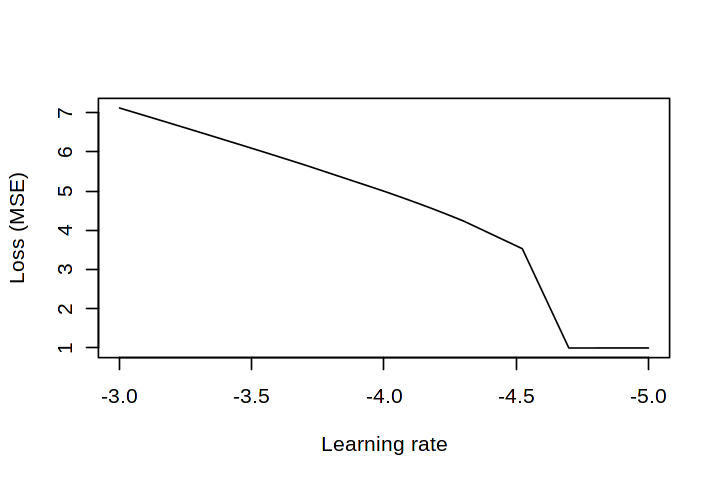

In [32]:
library(dplyr)
res <- res %>% arrange(learning_rate) 
res
options(repr.plot.width = 6, repr.plot.height = 4)
plot(res$loss ~ res$learning_rate, type="l",
     xlab="Learning rate", ylab="Loss (MSE)",
     xlim = rev(range(res$learning_rate)))
plot(log10(res$loss) ~ log10(res$learning_rate), type="l",
     xlab="Learning rate", ylab="Loss (MSE)",
     xlim = rev(range(log10(res$learning_rate))))

In [33]:
## iterating with the number of iterations
library(dplyr)
res <- NULL
number_iterations <- c(1e1,5e2,1e2,5e3,1e3,5e4,1e4,5e5,1e5,5e6,1e6,5e6,1e7)
for (iter in number_iterations) {
    gd <- gradientDesc(mtcars$disp, mtcars$mpg, 1e-5, iter)
    res <- rbind(res, data.frame(cbind(num_iter=iter, gd)))
}


[1] "Optimal intercept: 0.372122689853043 Optimal slope: 0.0577896558817319"
[1] "Optimal intercept: 0.40339410042047 Optimal slope: 0.0576830096623478"
[1] "Optimal intercept: 0.377868926265409 Optimal slope: 0.0577694719226901"
[1] "Optimal intercept: 0.689020549117122 Optimal slope: 0.056715497816284"
[1] "Optimal intercept: 0.435269216593067 Optimal slope: 0.057575038034957"
[1] "Optimal intercept: 3.39602418528588 Optimal slope: 0.0475459755354091"
[1] "Optimal intercept: 1.00310724276229 Optimal slope: 0.0556515816482282"
[1] "Optimal intercept: 19.7957853344517 Optimal slope: -0.008005473767826"
[1] "Optimal intercept: 6.10758603679019 Optimal slope: 0.0383610130620934"
[1] "Optimal intercept: 29.5993277419498 Optimal slope: -0.041213334790238"
[1] "Optimal intercept: 26.3112767334607 Optimal slope: -0.0300756116707874"
[1] "Optimal intercept: 29.5993277419498 Optimal slope: -0.041213334790238"
[1] "Optimal intercept: 29.5998547466422 Optimal slope: -0.041215119930533"


num_iter,w,b,loss
<dbl>,<dbl>,<dbl>,<dbl>
1e+01,0.057789656,0.3721227,196.542081
1e+02,0.057769472,0.3778689,196.468704
5e+02,0.057683010,0.4033941,196.142934
1e+03,0.057575038,0.4352692,195.736520
5e+03,0.056715498,0.6890205,192.516979
1e+04,0.055651582,1.0031072,188.570881
5e+04,0.047545976,3.3960242,159.922109
1e+05,0.038361013,6.1075860,130.482295
5e+05,-0.008005474,19.7957853,30.910567


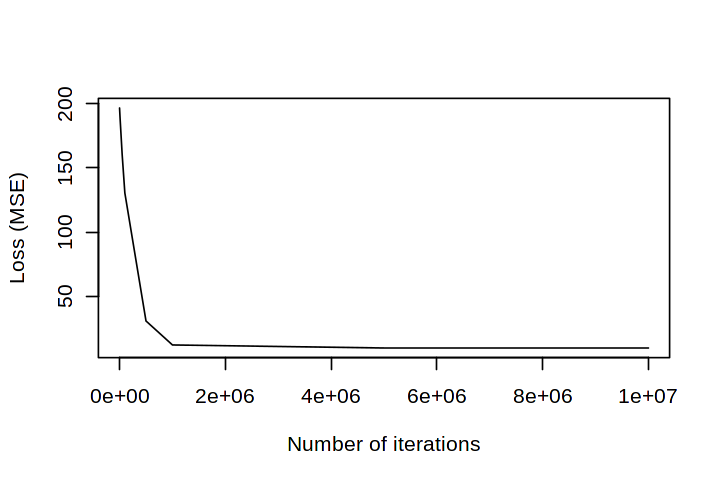

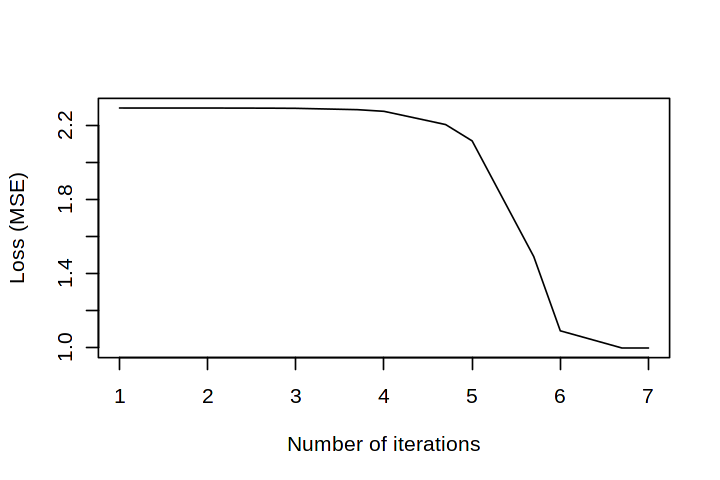

In [34]:
res <- res %>% arrange(num_iter)
res
options(repr.plot.width = 6, repr.plot.height = 4)
plot(res$loss ~ res$num_iter, type="l",xlab="Number of iterations", ylab="Loss (MSE)")
plot(log10(res$loss) ~ log10(res$num_iter), type="l",xlab="Number of iterations", ylab="Loss (MSE)")